In [85]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from   scipy.optimize import minimize
from   sklearn.preprocessing import PolynomialFeatures
%matplotlib inline

In [86]:
def loaddata(file, dim):
    data = np.loadtxt(file, delimiter=dim)
    print data[:, :6]
    return data

def plotdata(data, lb_x, lb_y, t_x, t_y, axes=None):
    neg = data[:,2] == 1
    pos = data[:,2] == 0
    neg_data = data[neg]
    pos_data = data[pos]
    if axes == None:
        axes = plt.gca()
    axes.scatter(neg_data[:,0], neg_data[:,1], marker='+', c='k', linewidth=2, label=t_x)
    axes.scatter(pos_data[:,0], pos_data[:,1], marker='o', c='y', linewidth=2, label=t_y)
    axes.set_xlabel(lb_x)
    axes.set_ylabel(lb_y)
    axes.legend(frameon=True, fancybox=True)
    
def sigmoid(theta, X):
    theta = theta.reshape(-1, 1)
    z = X.dot(theta)
    s = (1.0 / (1.0 + np.exp(-z)))
    return s

def cF(theta, X, y):
    theta = theta.reshape(-1, 1)
    y = y.reshape(-1, 1)
    h = sigmoid(theta, X)
    m = y.size
    J = (-1.0 / m) * (np.log(h).T.dot(y) + np.log(1 - h).T.dot(1 - y))
    if np.isnan(J[0]):
        return np.inf
    else:
        return J[0]
    
def gt(theta, X, y):
    theta = theta.reshape(-1, 1)
    y = y.reshape(-1, 1)
    h = sigmoid(theta, X)
    m = y.size
    grad = (1.0 / m) * X.T.dot(h - y)
    return grad.flatten()

In [87]:
#线性边界

[[ 34.62365962  78.02469282   0.        ]
 [ 30.28671077  43.89499752   0.        ]
 [ 35.84740877  72.90219803   0.        ]
 [ 60.18259939  86.3085521    1.        ]
 [ 79.03273605  75.34437644   1.        ]
 [ 45.08327748  56.31637178   0.        ]
 [ 61.10666454  96.51142588   1.        ]
 [ 75.02474557  46.55401354   1.        ]
 [ 76.0987867   87.42056972   1.        ]
 [ 84.43281996  43.53339331   1.        ]
 [ 95.86155507  38.22527806   0.        ]
 [ 75.01365839  30.60326323   0.        ]
 [ 82.30705337  76.4819633    1.        ]
 [ 69.36458876  97.71869196   1.        ]
 [ 39.53833914  76.03681085   0.        ]
 [ 53.97105215  89.20735014   1.        ]
 [ 69.07014406  52.74046973   1.        ]
 [ 67.94685548  46.67857411   0.        ]
 [ 70.66150955  92.92713789   1.        ]
 [ 76.97878373  47.57596365   1.        ]
 [ 67.37202755  42.83843832   0.        ]
 [ 89.67677575  65.79936593   1.        ]
 [ 50.53478829  48.85581153   0.        ]
 [ 34.21206098  44.2095286    0.  

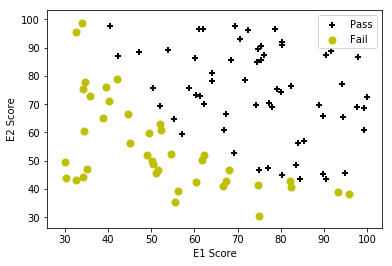

In [88]:
data1 = loaddata("data1.txt", ",")
plotdata(data1, "E1 Score", "E2 Score", "Pass", "Fail")


C:\ProgramData\Anaconda2\lib\site-packages\ipykernel_launcher.py:30: RuntimeWarning: divide by zero encountered in log


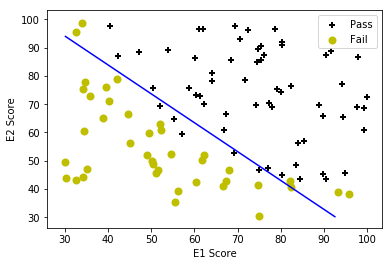

In [89]:
#梯度最小化损失函数
theta = np.c_[np.zeros(data1.shape[1])]
X = np.c_[np.ones(data1.shape[0]), data1[:,:2]]
y = np.c_[data1[:,2]]
res1 = minimize(cF, theta, args=(X,y), jac=gt, options={"maxiter":500})
#绘制线性边界
x1_min, x1_max = X[:,1].min(), X[:,1].max()
x2_min, x2_max = X[:,2].min(), X[:,2].max()
xx1, xx2 = np.meshgrid(np.linspace(x1_min, x1_max), np.linspace(x1_min, x2_max))
XX = np.c_[np.ones(xx1.ravel().size), xx1.ravel(), xx2.ravel()]
h = sigmoid(res1.x, XX)
h = h.reshape(xx1.shape)
plotdata(data1, "E1 Score", "E2 Score", "Pass", "Fail")
plt.contour(xx1, xx2, h, [0.5], linwidth=1, colors='b')

In [90]:
# 非线性边界

[[ 0.051267   0.69956    1.       ]
 [-0.092742   0.68494    1.       ]
 [-0.21371    0.69225    1.       ]
 [-0.375      0.50219    1.       ]
 [-0.51325    0.46564    1.       ]
 [-0.52477    0.2098     1.       ]
 [-0.39804    0.034357   1.       ]
 [-0.30588   -0.19225    1.       ]
 [ 0.016705  -0.40424    1.       ]
 [ 0.13191   -0.51389    1.       ]
 [ 0.38537   -0.56506    1.       ]
 [ 0.52938   -0.5212     1.       ]
 [ 0.63882   -0.24342    1.       ]
 [ 0.73675   -0.18494    1.       ]
 [ 0.54666    0.48757    1.       ]
 [ 0.322      0.5826     1.       ]
 [ 0.16647    0.53874    1.       ]
 [-0.046659   0.81652    1.       ]
 [-0.17339    0.69956    1.       ]
 [-0.47869    0.63377    1.       ]
 [-0.60541    0.59722    1.       ]
 [-0.62846    0.33406    1.       ]
 [-0.59389    0.005117   1.       ]
 [-0.42108   -0.27266    1.       ]
 [-0.11578   -0.39693    1.       ]
 [ 0.20104   -0.60161    1.       ]
 [ 0.46601   -0.53582    1.       ]
 [ 0.67339   -0.53582    1. 

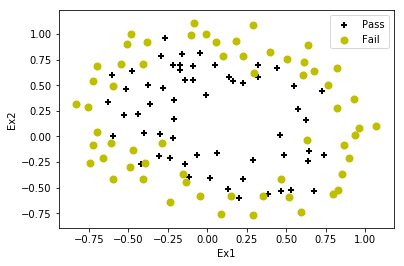

In [91]:
data2 = loaddata("data2.txt",",")
plotdata(data2, "Ex1", "Ex2", "Pass", "Fail")

In [92]:
#增加特征值

In [93]:
poly = PolynomialFeatures(6)
X_P = poly.fit_transform(data2[:,:2])
theta = np.c_[np.zeros(X_P.shape[1])]
y = data2[:,2]

In [94]:
#定义函数
def cFR(theta, X, y, R):
    theta = theta.reshape(-1,1)
    y = y.reshape(-1,1)
    m = y.size
    h = sigmoid(theta, X)
    J = (-1.0 / m) * (np.log(h).T.dot(y) + np.log(1 - h).T.dot(1 - y)) + (1.0 * R / (2 * m)) * sum(np.square(theta))
    if np.isnan(J[0]):
        return np.inf
    else:
        return J[0]
    
def gR(theta, X, y, R):
    theta = theta.reshape(-1, 1)
    y = y.reshape(-1,1)
    m = y.size
    h = sigmoid(theta, X)
    grad = (1.0 / m) * X.T.dot(h - y) + (1.0 * R / m) * theta 
    return grad.flatten()   
    
def predict(theta, X, y, threshold=0.5):
    theta = theta.reshape(-1, 1)
    y = y.reshape(-1, 1)
    h = sigmoid(theta, X) >= threshold
    p = h.astype('int') == y
    acc = 100.0 * sum(p)[0] / y.size
    return acc


In [1]:
#绘制决策边界
fig, axes = plt.subplots(1, 3, sharey=True, figsize=(17, 5))
#非线性边界LR回归
for i, R in enumerate([0, 1, 100]):
    theta = np.zeros(X_P.shape[1])
    res2  = minimize(cFR, theta, args=(X_P, y, R), jac=gR, options={"maxiter":3000})
    res3  = minimize(costFR, theta, args=(X_P, y, R), jac=gradientReg, options={"maxiter":3000})
    #形成网格点
    x1_min, x1_max = data2[:,0].min(), data2[:,0].max()
    x2_min, x2_max = data2[:,1].min(), data2[:,1].max()
    xx1, xx2 = np.meshgrid(np.linspace(x1_min, x1_max), np.linspace(x2_min, x2_max))
    X_P_G = poly.fit_transform(np.c_[xx1.ravel(), xx2.ravel()])
    h = sigmoid(res2.x, X_P_G)
    h = h.reshape(xx1.shape)
    #绘制决策边界
    axes.flatten()[i].contour(xx1, xx2, h, [0.5,0.6,0.7], linwidth=1, colors='g')
    #绘制散点图
    plotdata(data2, "Ex1 Score", "Ex2 Score", "Pass", "Fail", axes.flatten()[i])
    #显示精确度
    accuracy  = predict(res2.x, X_P, y)
    #计算准确率
    axes.flatten()[i].set_title("Accuracy {}% lambda={}".format(np.round(accuracy, decimals=2), R))

NameError: name 'plt' is not defined